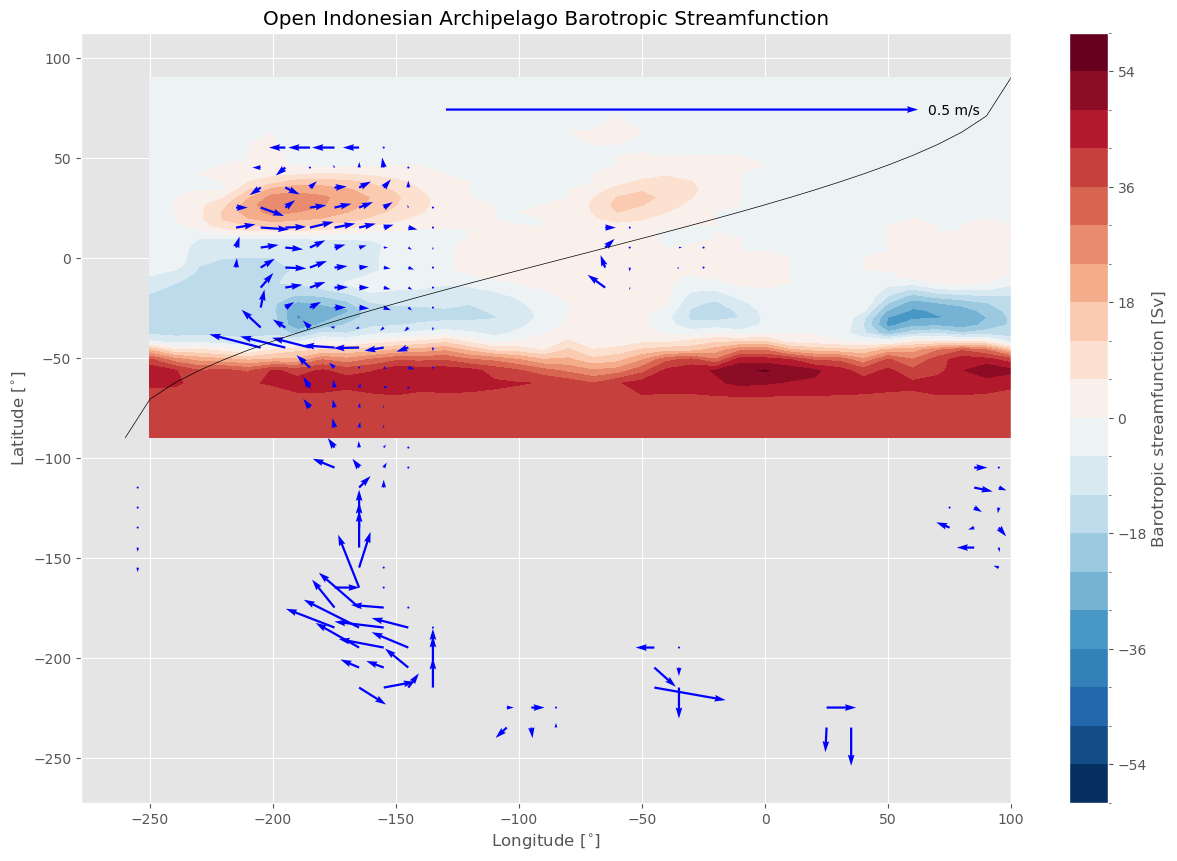

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Open data
open2D = xr.open_dataset("../model_outputs/open/fields_biogem_2d.nc")
open3D = xr.open_dataset("../model_outputs/open/fields_biogem_3d.nc")

# Pick ocean properties
lon_open = open2D["lon_edges"]  # deg
lat_open = open2D["lat_edges"]  # deg

u_open = open3D["phys_ocn_u"].isel(time=-1).isel(zt=-1)  # m/s
v_open = open3D["phys_ocn_v"].isel(time=-1).isel(zt=-1)  # m/s
barot_stream_open = open2D["phys_psi"].isel(time=-1)  # Sv

# Create a figure and axis for the combined plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the contour of the barotropic streamfunction
barot_stream_open.plot.contourf(levels=20, ax=ax)
ax.set_xlabel(r"Longitude $[^{\circ}$]")
ax.set_ylabel(r"Latitude $[^{\circ}$]")
ax.set_title("Open Indonesian Archipelago Barotropic Streamfunction")

# Overlay velocity vectors on the same plot
q = ax.quiver(u_open.lon, u_open.lon, u_open, v_open, color='b')
ax.quiverkey(q, 0.9, 0.9, 0.5, '0.5 m/s', labelpos='E', coordinates='axes')

# Add coastlines using lat_open and lon_open
ax.plot(lon_open, lat_open, 'k-', linewidth=0.5)

plt.show()
